# Analysis on Netflix Movies & TV Shows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
netflix_titles_df = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Data\\netflix_titles.csv")

In [3]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


# Data Preparation and Cleaning

In [4]:
netflix_titles_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are 8807 entries and 12 columns. 

### Handling Null Values

In [6]:
#Check if there are null in the dataset
netflix_titles_df.isnull().sum()

show_id         0   
type            0   
title           0   
director        2634
cast            825 
country         831 
date_added      10  
release_year    0   
rating          4   
duration        3   
listed_in       0   
description     0   
dtype: int64

In [7]:
#There are a few columns that contain null values ('director', 'cast', 'country', 'date_added', 'rating','duration').

In [8]:
netflix_titles_df['director'].fillna('No Director', inplace=True)
netflix_titles_df['cast'].fillna('No Cast', inplace=True)
netflix_titles_df['country'].fillna('Country Unavailable', inplace=True)
netflix_titles_df.dropna(subset=['date_added','rating','duration'],inplace=True)

In [9]:
netflix_titles_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [10]:
#There are no Null values in the dataset now.

In [11]:
# We are splitting Movies and Shows just to get more indepth of 2 categories.

In [12]:
netflix_movies_df = netflix_titles_df[netflix_titles_df['type'] =='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouché, Elizaveta Maximová","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies","After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them."


In [13]:
netflix_shows_df = netflix_titles_df[netflix_titles_df['type'] =='TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe."


### Data Preparation
In the duration column, there appears to be a discrepancy between movies and shows. Movies are based on the duration of the movie and shows are based on the number of seasons. 
To make EDA easier, I will convert the values in these columns into integers for both the movies and shows datasets.

In [14]:
#replacing 'min' with '' and converting to int
netflix_movies_df['duration'] = netflix_movies_df['duration'].str.replace(' min','').astype(int)

In [15]:
#Replace column name from 'duration' to 'seasons' in Tv shows df
netflix_shows_df.rename(columns={'duration':'seasons'},inplace = True)
#Few values have '1 season' instead of '1 seasons'. So we are replacing them
netflix_shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
#replacing 'seasons' with '' and converting to int
netflix_shows_df.seasons = netflix_shows_df.seasons.str.replace(' Seasons','').astype(int)

# Exploratory Analysis and Visualization

### Netflix Film Types: Movie or TV Show
It'd be interesting to see the comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority.

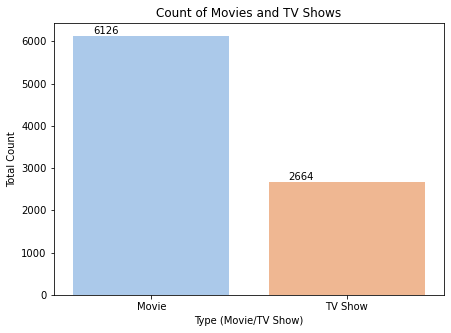

In [16]:
plt.figure(figsize=(7,5))
g = sns.countplot(netflix_titles_df['type'], palette="pastel");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
for p in g.patches:
        g.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

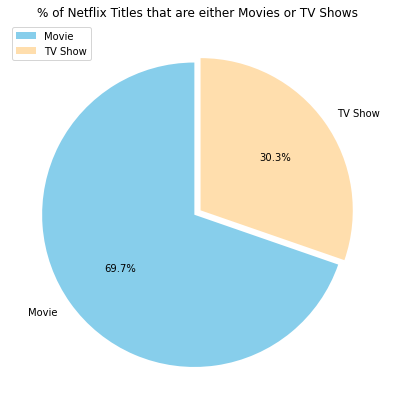

In [17]:
plt.figure(figsize=(7,7))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_titles_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_titles_df.type.unique(), colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=90);
plt.legend()
plt.show()

In [18]:
netflix_titles_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

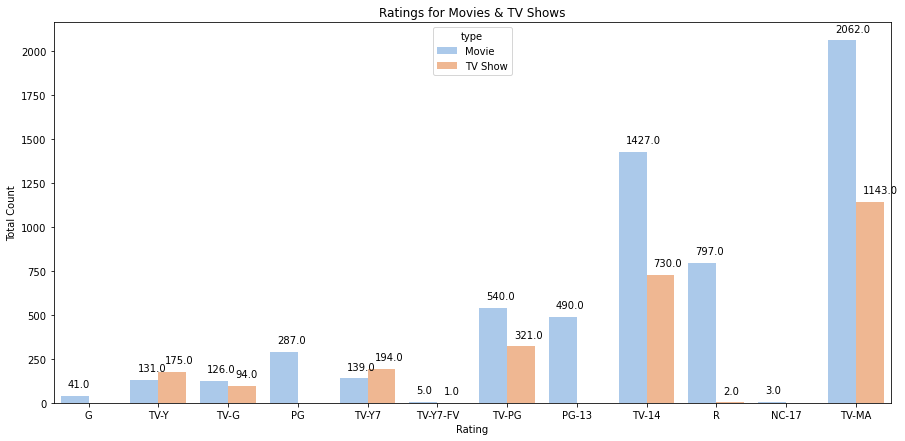

In [19]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(netflix_titles_df.rating, hue=netflix_titles_df.type, order=order, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
for p in g.patches:
        g.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

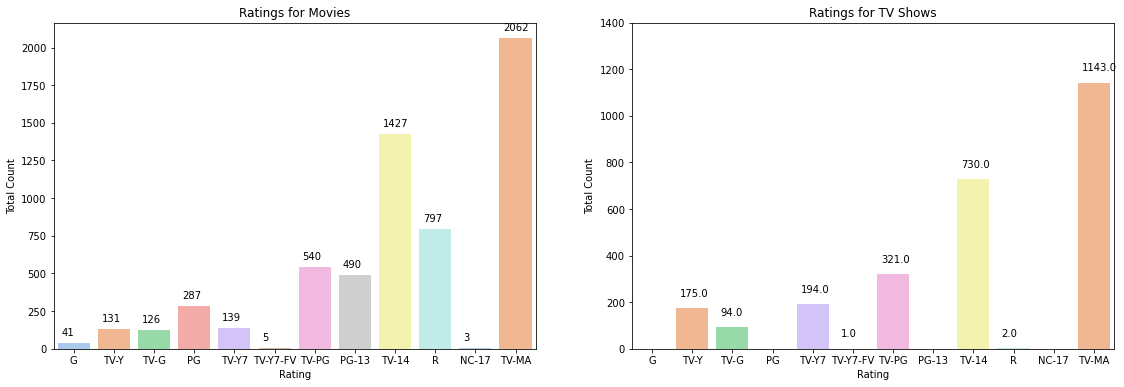

In [20]:
fig, ax = plt.subplots(1,2, figsize=(19, 6))
g1 = sns.countplot(netflix_movies_df.rating, order=order,palette="pastel", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
for p in g1.patches:
        g1.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

g2 = sns.countplot(netflix_shows_df.rating, order=order,palette="pastel", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
for p in g2.patches:
        g2.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
fig.show()

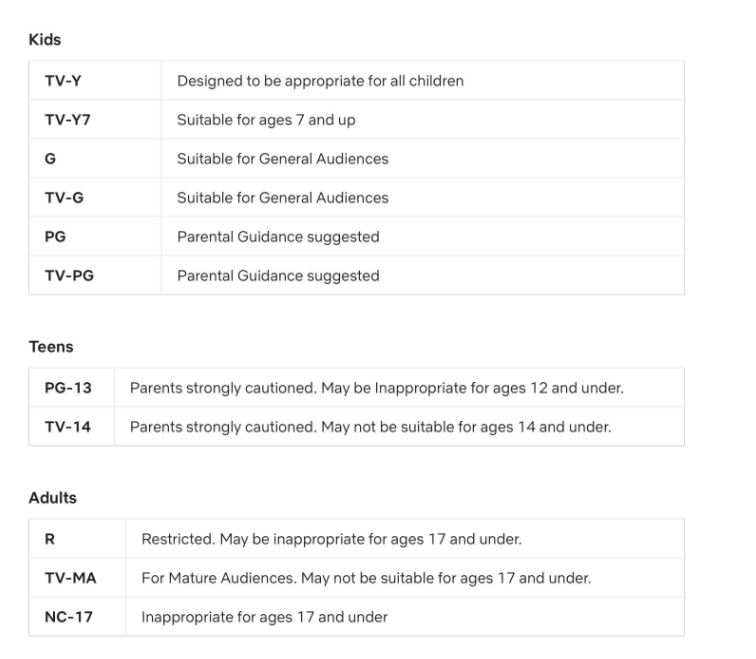

In [21]:
from IPython.display import Image
Image(filename="C:\\Users\\SHETTS60\\Downloads\\Capture.JPG")

Overall, there is much more content for a more mature audience. For the mature audience, there is much more movie content than there are TV shows. However, for the younger audience TV-Y, it is the opposite, there are slightly more TV shows than there are movies.

In [22]:
netflix_titles_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [23]:
#adding year and month to separate columns
netflix_titles_df['year_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).year
netflix_titles_df['month_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_shows_df['month_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).month

In [24]:
netflix_year = netflix_titles_df['year_added'].value_counts().to_frame().reset_index().rename(columns = {'index': 'year','year_added':'count'}).sort_values(by = ['year'],ascending = False)
#ignore 2021 year since it doesnt contain full year value
netflix_year = netflix_year[netflix_year.year != 2021]
netflix_year

,year,count
1,2020,1879
0,2019,2016
2,2018,1648
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
9,2013,11
10,2012,3
8,2011,13


In [25]:
netflix_year2 = netflix_titles_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2021]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2021]

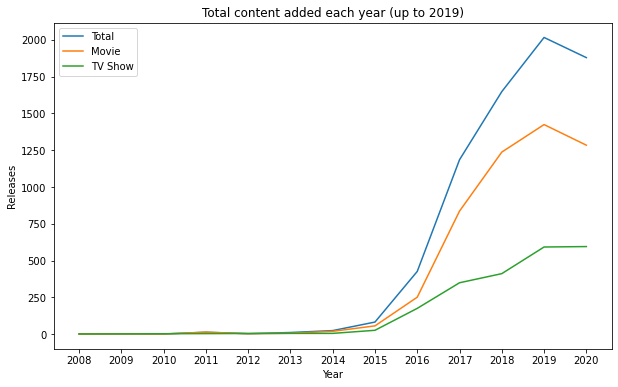

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2021, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Based on the above timeline, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous. I decided to exclude content added during 2021 since the data does not include a full years worth of data. We can see that there has been a consistent growth in the number of movies on Netflix compared to shows. Also we can see some decline during 2020 due to Covid19


In [27]:
month_year_df = netflix_titles_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T
month_year_df

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_added,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,43.0,71.0,129.0,153.0,205.0,132.0
2,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,15.0,82.0,86.0,148.0,114.0,109.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,17.0,124.0,173.0,172.0,137.0,112.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,92.0,115.0,162.0,177.0,188.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,33.0,115.0,164.0,131.0,129.0,178.0
9,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,47.0,113.0,124.0,123.0,168.0,183.0


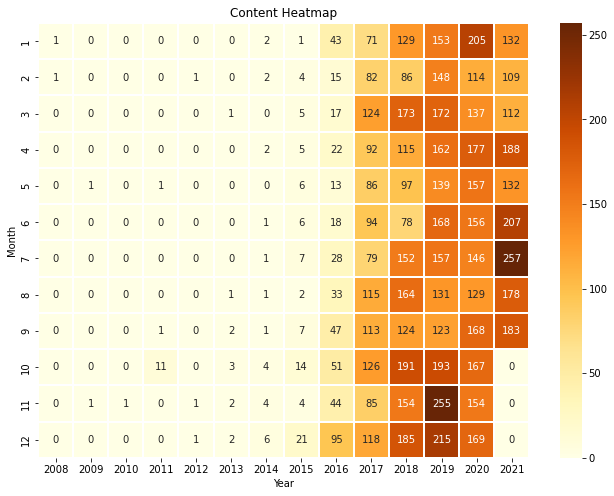

In [28]:
plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlOrBr",annot=True,fmt='g')
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the above heatmap, we can see that around 2015 is when Netflix began to increase their content count. We can see over the years and months, Netflix continues to slowly increase the amount of content that is being added into their platform. We can see in 2021, the data stops at September since that is the latest month available in the dataset.

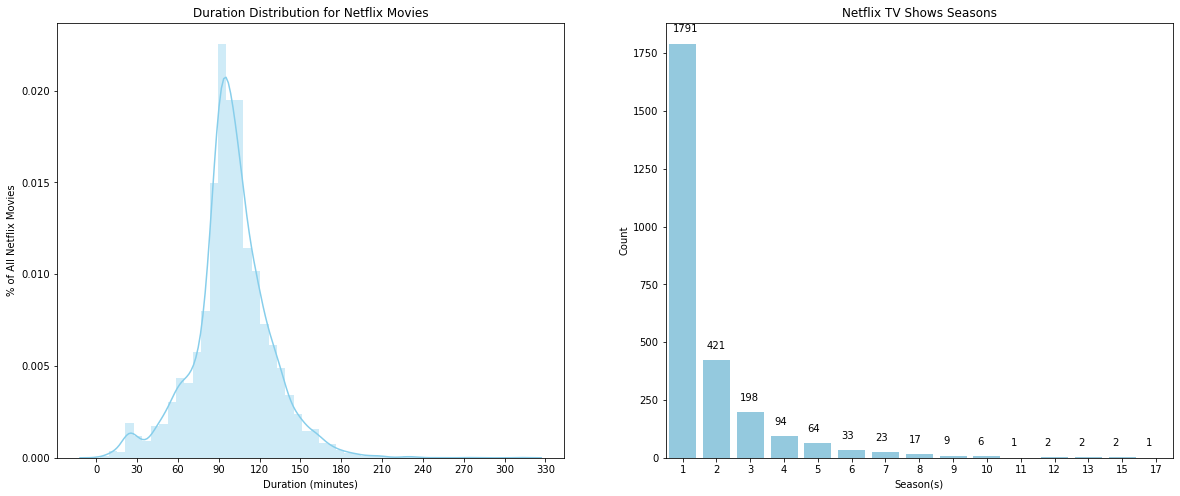

In [29]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
g1 = sns.distplot(netflix_movies_df.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")

        
        
g2 = sns.countplot(netflix_shows_df.seasons, color='skyblue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
for p in g2.patches:
        g2.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
fig.show()

Now we will look into the duration of Netflix films. Since movies are measured in time and shows are measured by seasons, we need to split the dataset between movies and TV shows. Above on the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

### Countries with the most content available

In [30]:
filtered_countries = netflix_titles_df.set_index('title').country.str.split(', ',expand = True).stack().reset_index(level=1, drop=True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

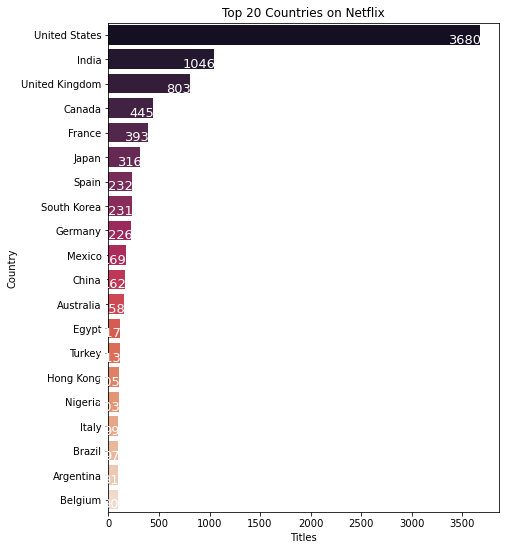

In [31]:
plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20],palette="rocket")
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
for p in g.patches:
    g.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(1, -18),fontsize=13,color='#FFFFFF', textcoords='offset points',horizontalalignment='right')
plt.show()

Now we will explore the countries with the most content on Netflix. Films typically are available in multiple countries as shown in the original dataset. Therefore, we need to seperate all countries within a film before we can analyze the data. After seperating countries and removing titles with no countries available, we can plot a Top 20 list to see which countries have the highest availability of films on Netflix. Unsurprisingly, the United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada. China interestingly is not even close to the top even though it has about 18% of the world's population. Reasons for this could be for political reasons and the banning of certain applications which isn't uncommon between the United States and China.

### Popular Genres

In [32]:
filtered_genres = netflix_titles_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

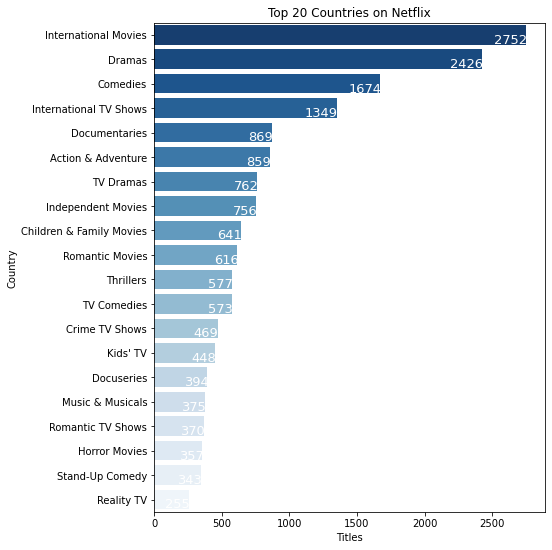

In [33]:
plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20],palette ='Blues_r')
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
for p in g.patches:
    g.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(1, -18),fontsize=13,color='#FFFFFF', textcoords='offset points',horizontalalignment='right')
plt.show()

In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.

# Asking and Answering Questions

### Who are the top 10 directors on Netflix with the most releases?

In [34]:
filtered_directors = netflix_titles_df.set_index('title').director.str.split(', ',expand = True).stack().reset_index(level = 1, drop = True)
filtered_directors= filtered_directors[filtered_directors != 'No Director']

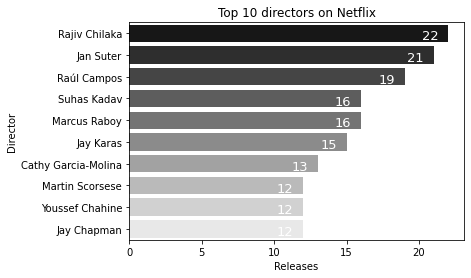

In [35]:
g = sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10],palette ='binary_r')
plt.title('Top 10 directors on Netflix')
plt.xlabel('Releases')
plt.ylabel('Director')
for p in g.patches:
    g.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(-10, -15),fontsize=13,color='#FFFFFF', textcoords='offset points',horizontalalignment='right')
plt.show()

As stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

### Who are the top 10 actors on Netflix based on number of titles?

In [36]:
filtered_cast = netflix_titles_df.set_index('title').cast.str.split(', ',expand = True).stack().reset_index(level = 1, drop = True)
filtered_cast= filtered_cast[filtered_cast != 'No Cast']


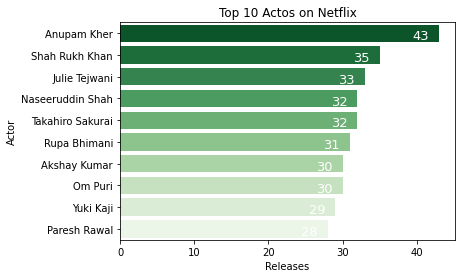

In [37]:
g = sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10],palette ='Greens_r')
plt.title('Top 10 Actos on Netflix')
plt.xlabel('Releases')
plt.ylabel('Actor')
for p in g.patches:
    g.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(-10, -15),fontsize=13,color='#FFFFFF', textcoords='offset points',horizontalalignment='right')
plt.show()

In this list, we can see that the most popular actors on Netflix based on the number of titles are all international as well. Most of them are Indian Actors

### How does the timeline look like for the addition of International Movies compared to International TV Shows?

In [38]:
international_movies = netflix_titles_df[netflix_titles_df.listed_in.str.contains('International Movies')]
international_movies_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
international_movies_year = international_movies_year[international_movies_year.year != 2021]

In [39]:
international_shows = netflix_titles_df[netflix_titles_df.listed_in.str.contains('International TV Shows')]
international_shows_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
international_shows_year = international_shows_year[international_shows_year.year != 2021]

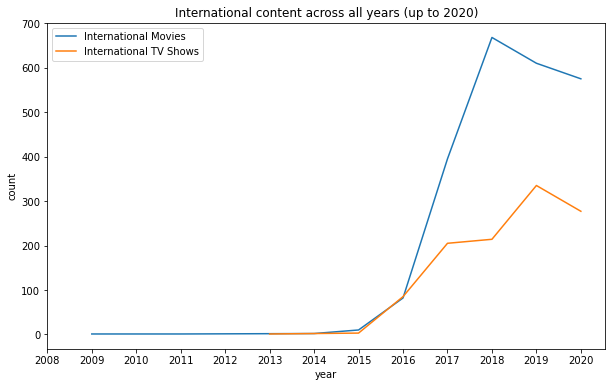

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=international_movies_year, x='year', y='count')
sns.lineplot(data=international_shows_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2021, 1))
plt.title("International content across all years (up to 2020)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

Based on the timeline, we can see that there are far more international movie releases than there are international tv show releases. 
However, near 2018, the growth of international movies started to decline while international tv shows constantly showed significant growth in the past few years. 
Year 2015 and 2016 almost have same number of international Movies and International tv shows. 
Year 2020 was hit with Covid 19

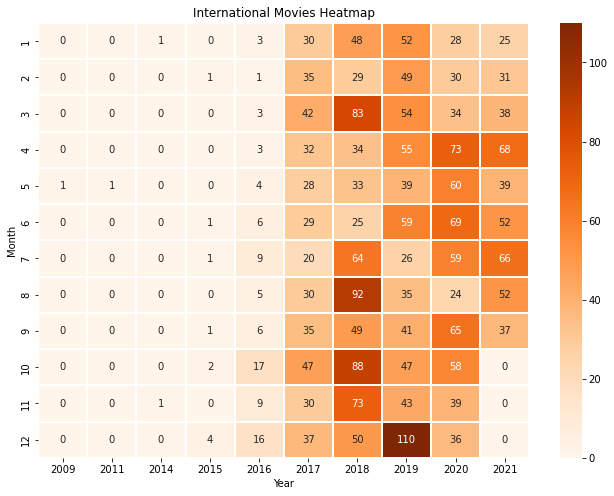

In [41]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025, cmap="Oranges",annot=True,fmt='g')
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the heatmap above, we can see that a majority of international movies were added throughout the year in 2018. Then in December 2019, Netflix added the most international movie content.

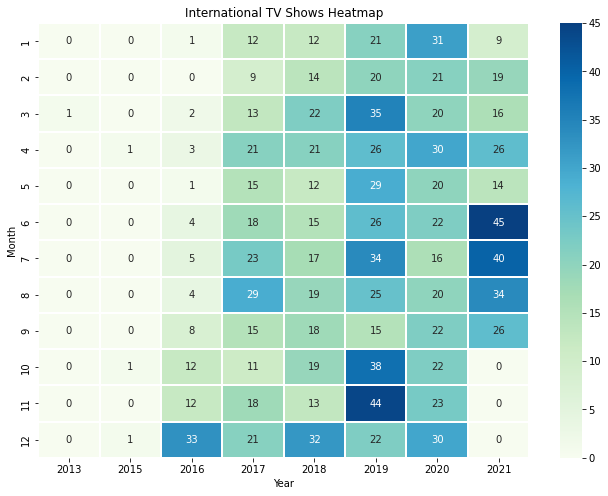

In [42]:
intsho_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intsho_month_year_df, linewidths=0.025, cmap="GnBu",annot=True,fmt='g')
plt.title("International TV Shows Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the above heatmap, we can see that the majority of international TV shows were added throughout the year 2019.

# Inferences and Conclusion
It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.

# References
* https://www.kaggle.com/shivamb/netflix-shows
* https://www.businessinsider.com/netflix-growth-comes-from-international-markets-2019-10